In [37]:
import lightgbm as lgb
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, make_scorer
from sklearn.model_selection import GridSearchCV



In [38]:
df=pd.read_csv("secom_lgb.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

In [39]:
df

,Pass/Fail,v0,v10,v102,v103,v120,v122,v124,v125,v127,...,v575,v577,v582,v587,v59,v65,v75,v82,v86,v90
0,0,0.212406,-0.330435,1.962264,1.638889,0.503669,-1.030252,1.071429,-0.765677,-1.492355,...,0.353576,0.203070,0.093023,0.029451,-0.435966,0.477294,0.732305,-0.251416,-0.278261,-0.304514
1,0,0.933964,-1.321739,-1.088534,1.555556,1.487061,-1.112605,0.714286,-0.752750,-1.467890,...,-0.331984,-0.522928,0.418605,0.546392,-0.026852,0.198261,0.092770,-0.113250,-0.550725,-0.860221
2,0,-0.257246,-0.321739,-1.011611,1.166667,1.389726,-0.615966,-1.357143,0.610561,-0.833028,...,-0.998650,-0.938245,-0.255814,0.010309,3.779256,-0.410046,-1.907230,0.475651,-0.067633,-1.282571
3,0,0.226982,-0.660870,1.013062,1.555556,0.320587,-0.602521,-0.500000,-0.544554,-0.740061,...,-0.510121,-0.510472,0.000000,0.010309,-2.142383,2.615932,-1.825834,-0.260476,0.948792,0.414045
4,0,-0.729791,0.443478,0.387518,1.361111,0.038625,-1.112605,0.714286,-0.752750,-1.467890,...,0.010796,-0.007599,-1.209302,0.030928,4.411632,-1.157181,1.011375,0.323896,-0.568116,-1.987431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1,-0.260918,-0.026087,0.767779,-0.194444,-0.802626,0.268908,0.428571,0.533553,0.143119,...,0.008097,0.014339,-0.674419,-0.309278,-0.353616,0.340324,-0.089400,-0.480181,-0.786473,0.733834
1563,1,0.457747,-0.539130,-0.635704,1.055556,-1.043646,0.228571,2.071429,0.390539,0.000612,...,-1.346829,-0.114207,1.860465,0.113402,-0.559263,0.476459,9.216801,0.169875,0.879227,-0.423207
1564,1,-0.667594,-0.373913,-0.341074,-0.361111,-0.899189,-1.232773,-0.357143,-0.570682,-1.486239,...,-0.124157,-0.201475,-0.744186,-0.288660,-0.991111,0.920971,-0.050640,-0.070215,0.206763,0.094760
1565,1,1.795160,-0.530435,0.557329,0.416667,0.537659,-0.010084,-0.071429,0.052255,0.061162,...,-0.124157,-0.289747,0.465116,1.020619,-1.165949,1.502700,0.666414,-1.832390,0.805797,0.000000


In [40]:
X = df.drop("Pass/Fail", axis=1)
y = df["Pass/Fail"].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42, stratify = y)

## SMOTE

In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12)
# train 데이터에서 오버샘플링 시키기
x_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 오버샘플링 적용 후 데이터 레이블 개수 살펴보기
print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', x_train_over.shape, y_train_over.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_train_over).value_counts())

오버샘플링 전 : (1096, 61) (1096,)

오버샘플링 후 : (2046, 61) (2046,)

오버샘플링 전 레이블 분포 :
 0    1023
1      73
dtype: int64

오버샘플링 후 레이블 분포 :
 0    1023
1    1023
dtype: int64


Class=0, n=1023 (65.284%)
Class=1, n=73 (4.659%)


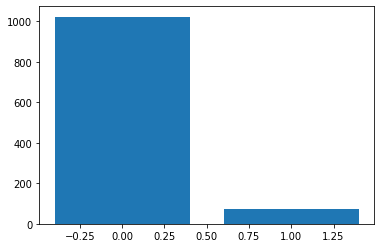

In [43]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
#plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=1023 (65.284%)
Class=1, n=1023 (65.284%)


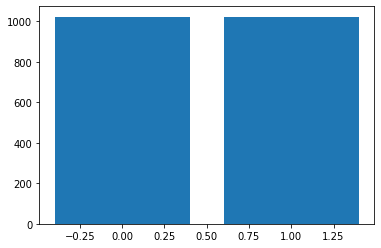

In [44]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train_over)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [45]:
df=pd.DataFrame(y_train_over)
df.columns = ['Pass/Fail']
df=pd.concat([df,x_train_over], axis=1)
df

,Pass/Fail,v0,v10,v102,v103,v120,v122,v124,v125,v127,...,v575,v577,v582,v587,v59,v65,v75,v82,v86,v90
0,0,0.343366,0.391304,0.152395,-1.361111,0.339900,0.442857,0.785714,0.261276,0.029358,...,0.385965,0.379650,-1.488372,0.422680,-0.040513,-0.305902,-0.701803,1.080408,-0.544928,-0.796196
1,0,0.906481,-0.408696,1.847605,-0.305556,-1.780610,0.014286,-0.285714,0.610561,0.050765,...,1.241565,1.696273,-0.302326,-0.144330,-0.765507,0.368848,-1.035137,-1.329558,-0.790338,0.000000
2,0,-0.337691,0.478261,-0.211901,-1.388889,-0.487447,-0.761345,-0.214286,0.833333,-0.993884,...,-0.267206,-0.270910,-0.418605,-0.917526,-0.740835,0.384361,0.197422,2.724802,0.000000,-0.239398
3,0,-1.402392,-0.573913,0.573295,-1.055556,-0.558517,-0.924370,-0.357143,0.481298,-1.190826,...,-0.267206,-0.270910,-1.116279,0.515464,-0.678023,1.128554,-0.628160,0.314836,0.713043,1.128807
4,0,0.654131,-0.608696,0.120464,0.472222,-3.646968,0.673109,0.000000,0.000000,0.820795,...,-0.110661,0.514666,0.279070,-0.711340,0.497630,-0.401821,1.026879,-0.158550,-0.885024,2.220649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,1,-0.313345,0.551063,-0.025206,0.446856,-1.279614,0.396204,1.062565,0.662233,0.551712,...,-1.454730,-0.827911,0.729239,0.436314,-0.231227,-0.088143,0.952504,-1.124055,-1.281643,0.426471
2042,1,0.370864,-0.153139,-0.134507,0.666667,0.730446,0.569971,0.720001,0.333223,0.493215,...,1.082084,0.743420,0.768107,0.342004,1.449670,1.700890,1.369162,0.866516,0.004356,0.430071
2043,1,-0.094716,0.962611,-0.682856,0.441669,-1.116385,0.253163,2.071429,0.386978,0.060009,...,-0.966583,-0.061998,-1.184083,-0.085224,0.646247,-0.906700,0.681271,0.095363,-0.011927,0.105566
2044,1,-0.476696,0.532148,1.047081,1.337235,-0.900376,-0.383841,0.027372,-0.470616,-0.246353,...,0.411489,0.031823,-0.060217,0.111970,1.503675,1.711014,-0.206845,-0.257696,-0.087877,-0.978639


In [46]:
feature_columns = df.columns.difference(["Pass/Fail"])
x = df[feature_columns]
y = df[["Pass/Fail"]]
train_x, test_x ,train_y, test_y = train_test_split(x, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1432, 61) (614, 61) (1432, 1) (614, 1)


In [47]:
lgb_clf = lgb.LGBMClassifier(num_leaves=31, objective='binary')
lgb_clf.fit(train_x, train_y)

lgbm_wrapper = lgb.LGBMClassifier(n_estimators = 400) 
#LGBM 의 조기 중단 수행 설정
evals = [(test_x, test_y)]
# params 의 dict 형태로 주지 않고, 직접 설정
lgbm_wrapper.fit(train_x,train_y, early_stopping_rounds = 100, eval_metric = 'logless', eval_set= evals , verbose = True)
preds = lgbm_wrapper.predict(test_x)
pred_proba = lgbm_wrapper.predict_proba(test_x)[:,1]
# 약 98.15 의 정확도를 가지는 것을 볼 수 있다.
print(" 정 확 도 : {0:.4f}".format(accuracy_score(test_y,preds)))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

[1]	valid_0's binary_logloss: 0.641223
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.594276
[3]	valid_0's binary_logloss: 0.555154
[4]	valid_0's binary_logloss: 0.52236
[5]	valid_0's binary_logloss: 0.490736
[6]	valid_0's binary_logloss: 0.460359
[7]	valid_0's binary_logloss: 0.43216
[8]	valid_0's binary_logloss: 0.411993
[9]	valid_0's binary_logloss: 0.392193
[10]	valid_0's binary_logloss: 0.370828
[11]	valid_0's binary_logloss: 0.351723
[12]	valid_0's binary_logloss: 0.337054
[13]	valid_0's binary_logloss: 0.322229
[14]	valid_0's binary_logloss: 0.307486
[15]	valid_0's binary_logloss: 0.293827
[16]	valid_0's binary_logloss: 0.28192
[17]	valid_0's binary_logloss: 0.269869
[18]	valid_0's binary_logloss: 0.257809
[19]	valid_0's binary_logloss: 0.247683
[20]	valid_0's binary_logloss: 0.237672
[21]	valid_0's binary_logloss: 0.22962
[22]	valid_0's binary_logloss: 0.218741
[23]	valid_0's binary_logloss: 0.208631
[24]	valid_0's binary_logloss:

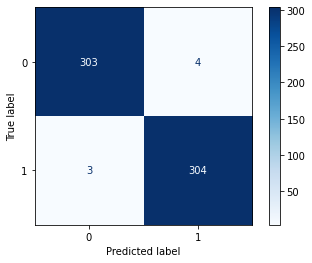

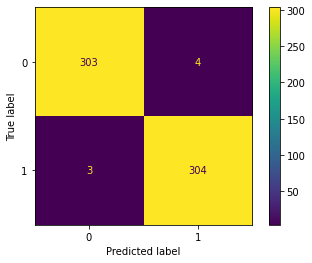

In [48]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_y,preds, labels=lgbm_wrapper.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lgbm_wrapper.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot()
plt.show()

confusion matrix=
 [[303   4]
 [  3 304]]
trainset 정확도:  1.0
testset 정확도:  0.988599348534202
accuracy=  0.988599348534202
precision=  0.987012987012987
recall=  0.990228013029316
f1 score=  0.9886178861788618


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

교차 검증=  0.98729918301628
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       307
           1       0.99      0.99      0.99       307

    accuracy                           0.99       614
   macro avg       0.99      0.99      0.99       614
weighted avg       0.99      0.99      0.99       614



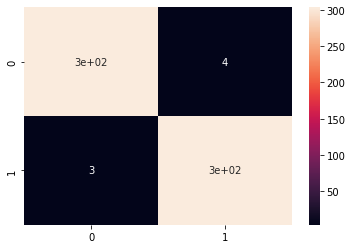

In [49]:
from sklearn.model_selection import cross_val_score
print('confusion matrix=\n',confusion_matrix(y_true=test_y,y_pred=preds))
print('trainset 정확도: ',lgbm_wrapper.score(train_x,train_y)) #trainset 정확도
print('testset 정확도: ',lgbm_wrapper.score(test_x,test_y)) #testset 정확도
print('accuracy= ',accuracy_score(y_true=test_y,y_pred=preds))
print('precision= ',precision_score(y_true=test_y,y_pred=preds))
print('recall= ',recall_score(y_true=test_y,y_pred=preds))
print('f1 score= ',f1_score(y_true=test_y,y_pred=preds))
print('교차 검증= ',cross_val_score(lgbm_wrapper,x,y).mean())
print(classification_report(test_y,preds))
heat=pd.DataFrame(confusion_matrix(test_y,preds))
sns.heatmap(heat,annot=True)

In [50]:
from sklearn.metrics import classification_report
y_pred = lgb_clf.predict(test_x)
accuracy_score(test_y, y_pred)

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       307
           1       0.97      0.99      0.98       307

    accuracy                           0.98       614
   macro avg       0.98      0.98      0.98       614
weighted avg       0.98      0.98      0.98       614



In [51]:
fpr,tpr,thresholds=roc_curve(test_y,preds,pos_label=1)

Auc: 0.988599348534202


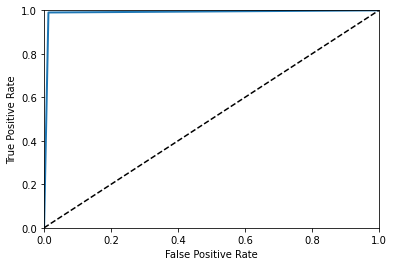

In [52]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr, linewidth = 2)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
auc=np.trapz(tpr,fpr)
print("Auc:",auc)

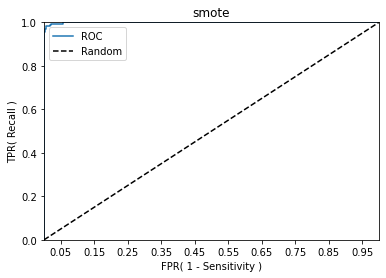

In [53]:
def roc_curve_plot(test_y , pred_proba_c1):

    fprs , tprs , thresholds = roc_curve(test_y ,pred_proba_c1)

  
    plt.plot(fprs , tprs, label='ROC')
   
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  

    plt.title('smote')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
  
roc_curve_plot(test_y, lgb_clf.predict_proba(test_x)[:, 1] )

## ADASYN
#### SMOTE의 개선된 버전이다. 동일한 프로세스를 진행한 후 점들에 임의의 작은 값을 더해줌으로써 조금 더 사실적인 데이터가 생성된다. 즉 모든 표본이 약간 더 분산된다.

In [54]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE

print('Original dataset shape %s' % Counter(y_train))

ada = ADASYN(random_state=12)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', X_res.shape, y_res.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_res).value_counts())

Original dataset shape Counter({0: 1023, 1: 73})
Resampled dataset shape Counter({0: 1023, 1: 1002})
오버샘플링 전 : (1096, 61) (1096,)

오버샘플링 후 : (2025, 61) (2025,)

오버샘플링 전 레이블 분포 :
 0    1023
1      73
dtype: int64

오버샘플링 후 레이블 분포 :
 0    1023
1    1002
dtype: int64


In [55]:
df=pd.DataFrame(y_res)
df.columns = ['Pass/Fail']
df=pd.concat([df,X_res], axis=1)
df

,Pass/Fail,v0,v10,v102,v103,v120,v122,v124,v125,v127,...,v575,v577,v582,v587,v59,v65,v75,v82,v86,v90
0,0,0.343366,0.391304,0.152395,-1.361111,0.339900,0.442857,0.785714,0.261276,0.029358,...,0.385965,0.379650,-1.488372,0.422680,-0.040513,-0.305902,-0.701803,1.080408,-0.544928,-0.796196
1,0,0.906481,-0.408696,1.847605,-0.305556,-1.780610,0.014286,-0.285714,0.610561,0.050765,...,1.241565,1.696273,-0.302326,-0.144330,-0.765507,0.368848,-1.035137,-1.329558,-0.790338,0.000000
2,0,-0.337691,0.478261,-0.211901,-1.388889,-0.487447,-0.761345,-0.214286,0.833333,-0.993884,...,-0.267206,-0.270910,-0.418605,-0.917526,-0.740835,0.384361,0.197422,2.724802,0.000000,-0.239398
3,0,-1.402392,-0.573913,0.573295,-1.055556,-0.558517,-0.924370,-0.357143,0.481298,-1.190826,...,-0.267206,-0.270910,-1.116279,0.515464,-0.678023,1.128554,-0.628160,0.314836,0.713043,1.128807
4,0,0.654131,-0.608696,0.120464,0.472222,-3.646968,0.673109,0.000000,0.000000,0.820795,...,-0.110661,0.514666,0.279070,-0.711340,0.497630,-0.401821,1.026879,-0.158550,-0.885024,2.220649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,1,0.496536,-0.726283,0.139563,0.301376,0.119624,-0.867503,0.141631,-0.900954,-0.913622,...,-0.952575,-0.035135,0.213353,-0.684779,0.389474,-0.255150,-0.379683,0.110544,0.457465,0.026328
2021,1,0.330250,-0.128325,-0.182587,-0.058137,-0.203556,-0.416670,0.838022,-0.462081,-0.530973,...,-0.386134,0.134372,0.101410,-0.761628,-0.166020,-0.327502,0.033093,-0.063882,0.130911,-0.514766
2022,1,0.111262,0.587067,-0.596569,-0.208814,-0.556941,0.090063,1.806664,0.207515,-0.113499,...,0.260499,0.337471,-0.087813,-0.738328,-0.198865,-0.306769,0.320432,-0.013713,-0.085716,-1.125958
2023,1,0.411057,-0.062799,-0.227285,0.541819,0.111427,0.261308,-0.285786,-0.194009,0.390803,...,-0.993252,-0.807700,0.436099,0.322532,0.239256,-0.561648,0.795633,-0.054908,-0.222407,-0.298806


In [56]:
feature_columns = df.columns.difference(["Pass/Fail"])
x = df[feature_columns]
y = df[["Pass/Fail"]]
train_x, test_x ,train_y, test_y = train_test_split(x, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1417, 61) (608, 61) (1417, 1) (608, 1)


In [57]:
lgb_clf = lgb.LGBMClassifier(num_leaves=31, objective='binary')
lgb_clf.fit(train_x, train_y)

lgbm_wrapper = lgb.LGBMClassifier(n_estimators = 400) 
#LGBM 의 조기 중단 수행 설정
evals = [(test_x, test_y)]
# params 의 dict 형태로 주지 않고, 직접 설정
lgbm_wrapper.fit(train_x,train_y, early_stopping_rounds = 100, eval_metric = 'logless', eval_set= evals , verbose = True)
preds = lgbm_wrapper.predict(test_x)
pred_proba = lgbm_wrapper.predict_proba(test_x)[:,1]
# 약 97.75 의 정확도를 가지는 것을 볼 수 있다.
print(" 정 확 도 : {0:.4f}".format(accuracy_score(test_y,preds)))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

[1]	valid_0's binary_logloss: 0.63697
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.587361
[3]	valid_0's binary_logloss: 0.546317
[4]	valid_0's binary_logloss: 0.510871
[5]	valid_0's binary_logloss: 0.480411
[6]	valid_0's binary_logloss: 0.450826
[7]	valid_0's binary_logloss: 0.42288
[8]	valid_0's binary_logloss: 0.402283
[9]	valid_0's binary_logloss: 0.382951
[10]	valid_0's binary_logloss: 0.363683
[11]	valid_0's binary_logloss: 0.3478
[12]	valid_0's binary_logloss: 0.332853
[13]	valid_0's binary_logloss: 0.318087
[14]	valid_0's binary_logloss: 0.30456
[15]	valid_0's binary_logloss: 0.292206
[16]	valid_0's binary_logloss: 0.28042
[17]	valid_0's binary_logloss: 0.270201
[18]	valid_0's binary_logloss: 0.259213
[19]	valid_0's binary_logloss: 0.249972
[20]	valid_0's binary_logloss: 0.240472
[21]	valid_0's binary_logloss: 0.232566
[22]	valid_0's binary_logloss: 0.223654
[23]	valid_0's binary_logloss: 0.217332
[24]	valid_0's binary_logloss: 0

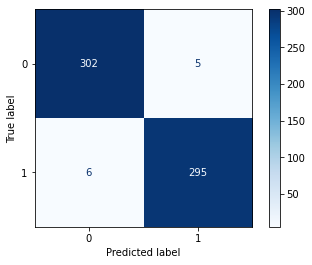

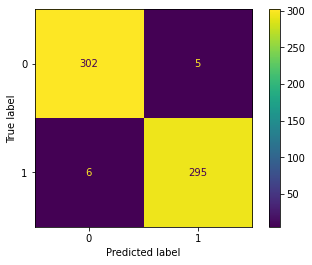

In [58]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_y,preds, labels=lgbm_wrapper.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lgbm_wrapper.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot()
plt.show()

confusion matrix=
 [[302   5]
 [  6 295]]
trainset 정확도:  1.0
testset 정확도:  0.9819078947368421
accuracy=  0.9819078947368421
precision=  0.9833333333333333
recall=  0.9800664451827242
f1 score=  0.9816971713810315


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

교차 검증=  0.9807407407407407
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       307
           1       0.98      0.98      0.98       301

    accuracy                           0.98       608
   macro avg       0.98      0.98      0.98       608
weighted avg       0.98      0.98      0.98       608



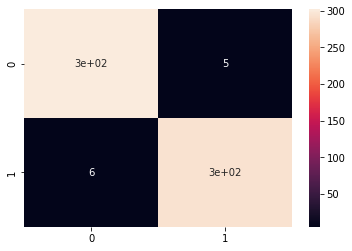

In [59]:
from sklearn.model_selection import cross_val_score
print('confusion matrix=\n',confusion_matrix(y_true=test_y,y_pred=preds))
print('trainset 정확도: ',lgbm_wrapper.score(train_x,train_y)) #trainset 정확도
print('testset 정확도: ',lgbm_wrapper.score(test_x,test_y)) #testset 정확도
print('accuracy= ',accuracy_score(y_true=test_y,y_pred=preds))
print('precision= ',precision_score(y_true=test_y,y_pred=preds))
print('recall= ',recall_score(y_true=test_y,y_pred=preds))
print('f1 score= ',f1_score(y_true=test_y,y_pred=preds))
print('교차 검증= ',cross_val_score(lgbm_wrapper,x,y).mean())
print(classification_report(test_y,preds))
heat=pd.DataFrame(confusion_matrix(test_y,preds))
sns.heatmap(heat,annot=True)

In [60]:
fpr,tpr,thresholds=roc_curve(test_y,preds,pos_label=1)

Auc: 0.9818899001157921


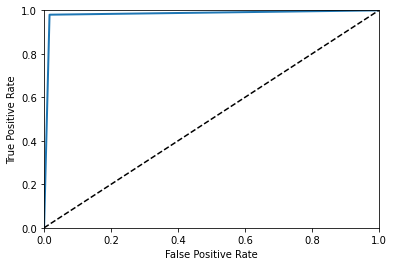

In [61]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr, linewidth = 2)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
auc=np.trapz(tpr,fpr)
print("Auc:",auc)

In [62]:
from sklearn.metrics import classification_report
y_pred = lgb_clf.predict(test_x)
accuracy_score(test_y, y_pred)

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       307
           1       0.98      0.97      0.98       301

    accuracy                           0.98       608
   macro avg       0.98      0.98      0.98       608
weighted avg       0.98      0.98      0.98       608



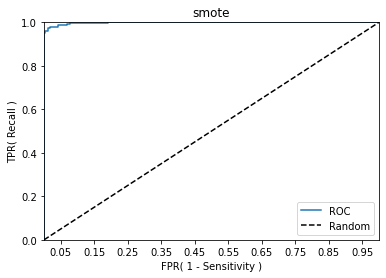

In [63]:
def roc_curve_plot(test_y , pred_proba_c1):

    fprs , tprs , thresholds = roc_curve(test_y ,pred_proba_c1)

  
    plt.plot(fprs , tprs, label='ROC')
   
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  

    plt.title('smote')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
  
roc_curve_plot(test_y, lgb_clf.predict_proba(test_x)[:, 1] )